Shape of the dataset: (128975, 2)

First 10 rows of the dataset:
        Date  Amount
0 2022-04-30  647.62
1 2022-04-30  406.00
2 2022-04-30  329.00
3 2022-04-30  753.33
4 2022-04-30  574.00
5 2022-04-30  824.00
6 2022-04-30  653.00
7 2022-04-30  399.00
8 2022-04-30     NaN
9 2022-04-30  363.00

Monthly aggregated data:
Date
2022-03-31      101683.85
2022-04-30    28838708.32
2022-05-31    26226476.75
2022-06-30    23425809.38
Freq: ME, Name: Amount, dtype: float64


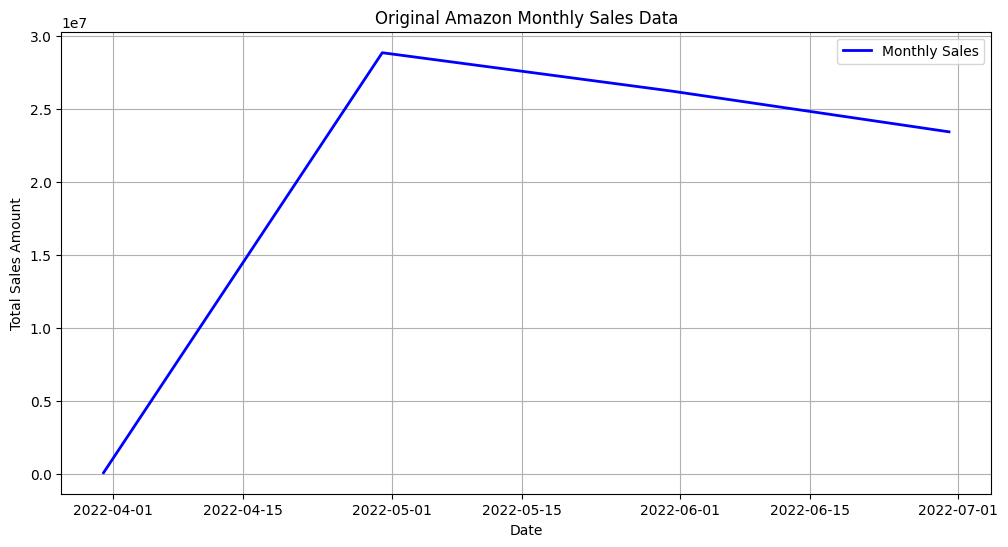


First 10 values of rolling mean (window=5):
Date
2022-03-31   NaN
2022-04-30   NaN
2022-05-31   NaN
2022-06-30   NaN
Freq: ME, Name: Amount, dtype: float64

First 20 values of rolling mean (window=10):
Date
2022-03-31   NaN
2022-04-30   NaN
2022-05-31   NaN
2022-06-30   NaN
Freq: ME, Name: Amount, dtype: float64


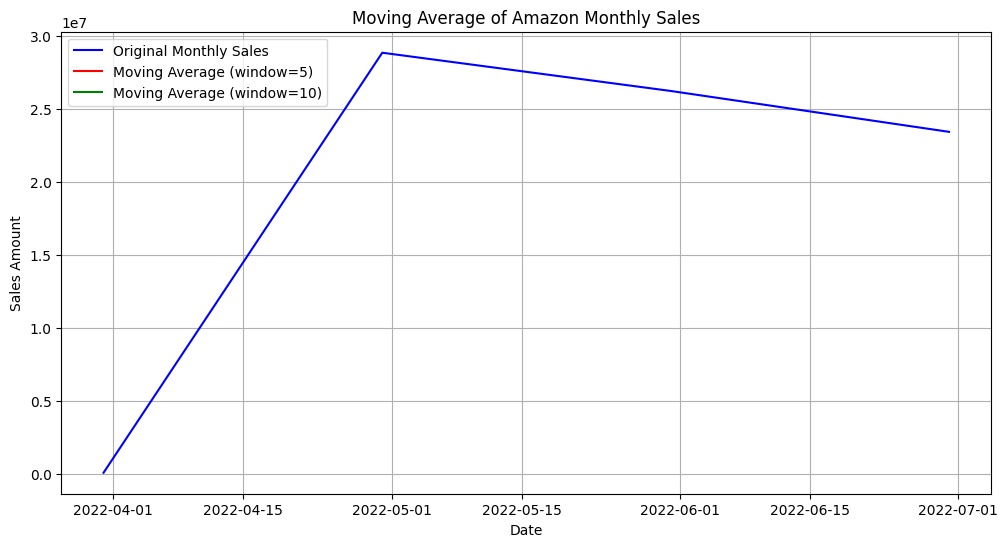

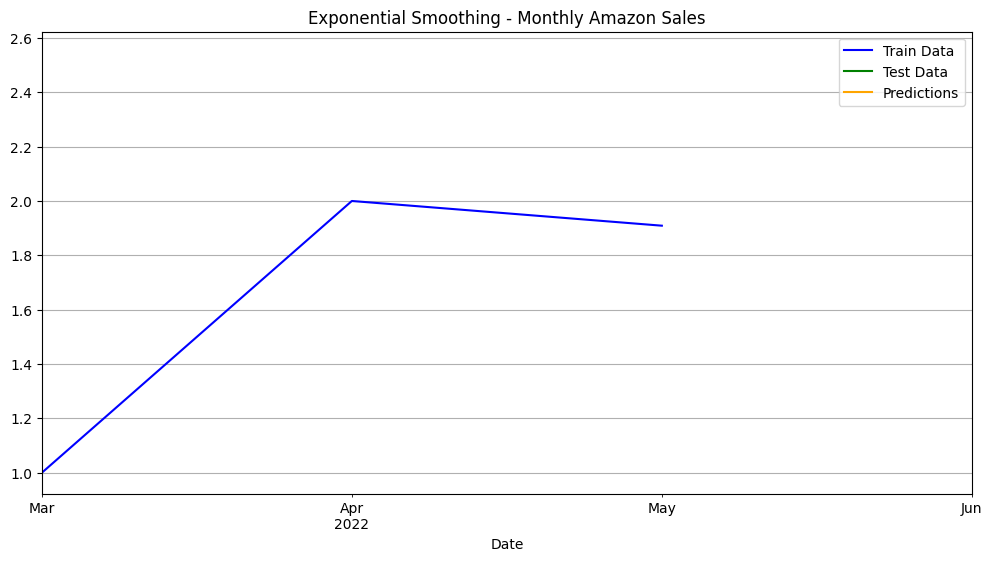


Mean Squared Error (MSE): 0.5385
Data Variance: 0.45993
Data Mean: 1.68018


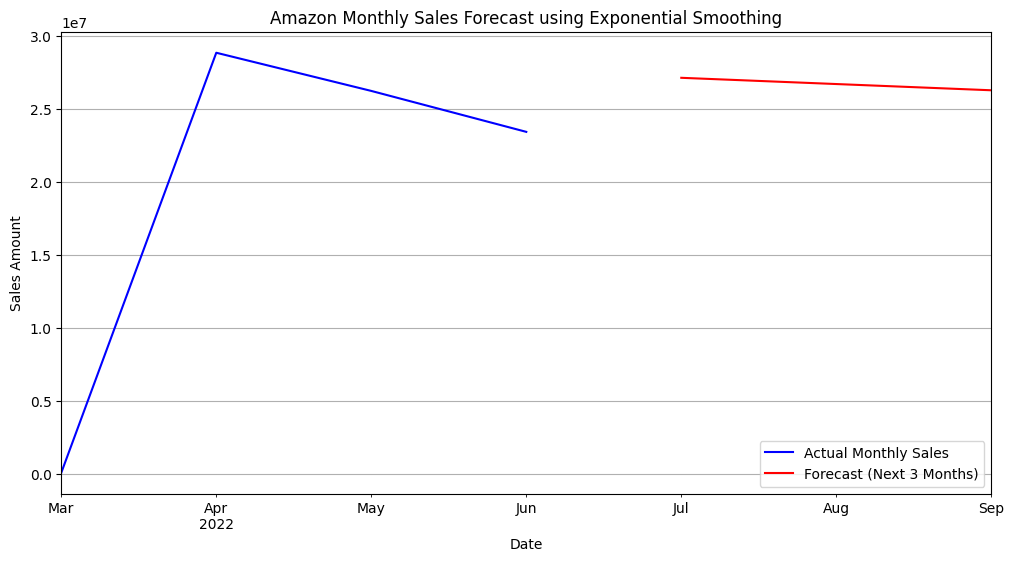

In [5]:
# Ex.No: 08 MOVING AVERAGE MODEL AND EXPONENTIAL SMOOTHING
# AIM: To implement Moving Average Model and Exponential Smoothing using monthly Amazon sales data.

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings('ignore')

# ==========================
# STEP 1: READ THE DATASET
# ==========================
data = pd.read_csv("Amazon Sale Report.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Keep only Date and Amount columns
sales_data = data[['Date', 'Amount']]

# Display dataset info
print("Shape of the dataset:", sales_data.shape)
print("\nFirst 10 rows of the dataset:")
print(sales_data.head(10))

# ===================================
# STEP 2: AGGREGATE TO MONTHLY SALES
# ===================================
sales_data.set_index('Date', inplace=True)
monthly_data = sales_data['Amount'].resample('M').sum()  # Sum of sales for each month

print("\nMonthly aggregated data:")
print(monthly_data.head())

# ==================================
# STEP 3: PLOT ORIGINAL MONTHLY DATA
# ==================================
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Sales', color='blue', linewidth=2)
plt.title('Original Amazon Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid()
plt.show()

# ===============================
# STEP 4: MOVING AVERAGE (5 & 10)
# ===============================
rolling_mean_5 = monthly_data.rolling(window=5).mean()
rolling_mean_10 = monthly_data.rolling(window=10).mean()

print("\nFirst 10 values of rolling mean (window=5):")
print(rolling_mean_5.head(10))
print("\nFirst 20 values of rolling mean (window=10):")
print(rolling_mean_10.head(20))

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Original Monthly Sales', color='blue')
plt.plot(rolling_mean_5, label='Moving Average (window=5)', color='red')
plt.plot(rolling_mean_10, label='Moving Average (window=10)', color='green')
plt.title('Moving Average of Amazon Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.show()

# ====================================================
# STEP 5: DATA TRANSFORMATION FOR EXPONENTIAL MODEL
# ====================================================
scaler = MinMaxScaler()
scaled_data = pd.Series(
    scaler.fit_transform(monthly_data.values.reshape(-1, 1)).flatten(),
    index=monthly_data.index
)

# Avoid non-positive values for multiplicative model
scaled_data = scaled_data + 1

# Split into training and testing sets (80/20)
x = int(len(scaled_data) * 0.8)
train_data = scaled_data[:x]
test_data = scaled_data[x:]

# ==========================================
# STEP 6: EXPONENTIAL SMOOTHING (Additive)
# ==========================================
# Since you only have ~5 months of data, seasonal pattern is too short — use additive trend only
model_add = ExponentialSmoothing(train_data, trend='add', seasonal=None).fit()
test_predictions = model_add.forecast(steps=len(test_data))

# Plot actual vs predicted
ax = train_data.plot(figsize=(12, 6), label='Train Data', color='blue')
test_data.plot(ax=ax, label='Test Data', color='green')
test_predictions.plot(ax=ax, label='Predictions', color='orange')
ax.legend()
ax.set_title('Exponential Smoothing - Monthly Amazon Sales')
plt.grid()
plt.show()

# Evaluate model performance
mse = mean_squared_error(test_data, test_predictions)
print("\nMean Squared Error (MSE):", round(mse, 5))
print("Data Variance:", round(np.sqrt(scaled_data.var()), 5))
print("Data Mean:", round(scaled_data.mean(), 5))

# ==========================================
# STEP 7: FORECAST FUTURE (NEXT 3 MONTHS)
# ==========================================
model_final = ExponentialSmoothing(monthly_data, trend='add', seasonal=None).fit()
forecast = model_final.forecast(steps=3)  # Forecast next 3 months

# Plot forecast
ax = monthly_data.plot(figsize=(12, 6), label='Actual Monthly Sales', color='blue')
forecast.plot(ax=ax, label='Forecast (Next 3 Months)', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Sales Amount')
ax.set_title('Amazon Monthly Sales Forecast using Exponential Smoothing')
ax.legend()
plt.grid()
plt.show()
